In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import datetime as dt
from matplotlib import dates
import time


In [2]:
react = pd.read_csv('react.csv')
vue = pd.read_csv('vue.csv')
angular = pd.read_csv('angular.csv')


### Part 1: Assessing the duration of issue stage transitions in relation to the library or framework being used

In [3]:
columns = ['opened', 'discussion', 'firstInsiderResponse', 'pullrequest', 'merged', 'closed']
# CHANGE HERE FOR NEW FRAMEWORK
reactAxis = []
vueAxis = []
angularAxis = []
labelCategories = []

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        cols = [columns[i], columns[j]]

        # CHANGE HERE FOR NEW FRAMEWORK

        df_react = react[cols].dropna(how='any')
        react_mean = (pd.to_datetime(df_react[columns[j]]) - pd.to_datetime(df_react[columns[i]])).abs().mean()

        df_vue = vue[cols].dropna(how='any')
        vue_mean = (pd.to_datetime(df_vue[columns[j]]) - pd.to_datetime(df_vue[columns[i]])).abs().mean()

        df_angular = angular[cols].dropna(how='any')
        angular_mean = (pd.to_datetime(df_angular[columns[j]]) - pd.to_datetime(df_angular[columns[i]])).abs().mean()
        # CHANGE HERE FOR NEW FRAMEWORK
        if not pd.isnull(react_mean) and not pd.isnull(vue_mean) and not pd.isnull(angular_mean):
            reactAxis.append(react_mean.total_seconds()/3600)
            vueAxis.append(vue_mean.total_seconds()/3600)
            angularAxis.append(angular_mean.total_seconds()/3600)
            labelCategories.append(columns[i] + ":" + columns[j])
            

print(np.mean(reactAxis), np.mean(vueAxis), np.mean(angularAxis))


32.20327519972222 124.10792809538889 44.3658826535


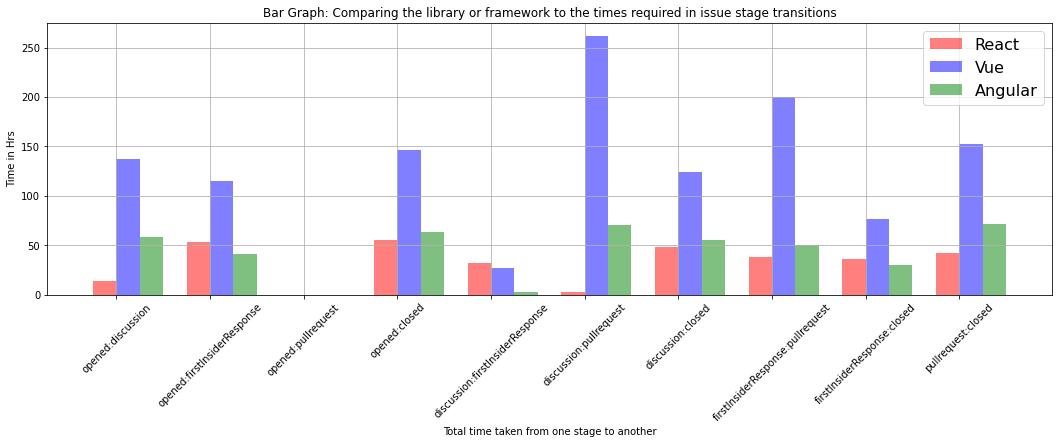

In [4]:
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)

plt.bar(np.array(range(len(labelCategories)))-0.25, reactAxis, width=0.25, color='red', align='edge', alpha=0.5, label='React')
plt.bar(range(len(labelCategories)), vueAxis, width=0.25, color='blue', align='edge', alpha=0.5, label='Vue')
plt.bar(np.array(range(len(labelCategories)))+0.25, angularAxis, width=0.25, color='green', align='edge', alpha=0.5, label='Angular')
# Add a legend to the plot
ax.legend(fontsize = 16)

plt.xticks(np.array(range(len(labelCategories))), labelCategories)
plt.xticks(rotation=45)

# Set the x-axis label and title
ax.set_ylabel('Time in Hrs')
ax.set_xlabel('Total time taken from one stage to another')
ax.set_title('Bar Graph: Comparing the library or framework to the times required in issue stage transitions')

# Format the y-axis tick labels as time strings
# date_format = mdates.DateFormatter('%H:%M')
# ax.yaxis.set_major_formatter(date_format)
# ax.yaxis.set_major_locator(mdates.MinuteLocator(interval=30))
# formatter = dates.DateFormatter('%Y-%m-%d %H:%M:%S')
# ax.yaxis.set_major_formatter(formatter)
# ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda s, x: time.strftime('%H:%M:%S', time.gmtime(s))))


# Display the result
ax.grid(True)
plt.show()

### Part 2: Assessing the duration of issue stage transitions in relation to the library or framework being used

In [5]:
columns = ['discussion','totalResponseByContributor','totalResponseByCollaborator','totalResponseByMembers','totalResponseByAuthor','totalResponseByOthers']
df_react = react[columns].loc[react['discussion'].notnull()]
df_vue = vue[columns].loc[vue['discussion'].notnull()]
df_angular = angular[columns].loc[angular['discussion'].notnull()]


C:\Users\saura\AppData\Local\Temp\ipykernel_29292\3707101103.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_react.plot(subplots = True, ax=ax, linewidth=2)


Text(0, 0.5, 'Frequency of responses')

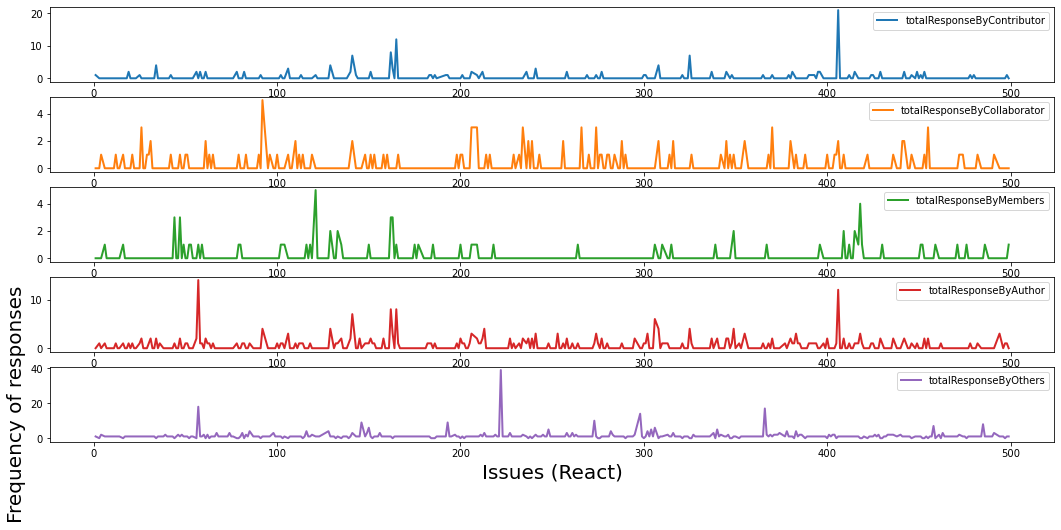

In [6]:
fig, ax = plt.subplots(figsize=(18, 8))
df_react.plot(subplots = True, ax=ax, linewidth=2)
plt.xlabel("Issues (React)", size = 20)
plt.ylabel("Frequency of responses", size = 20)


C:\Users\saura\AppData\Local\Temp\ipykernel_29292\3047814908.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_vue.plot(subplots = True, ax=ax, linewidth=2)


Text(0, 0.5, 'Frequency of responses')

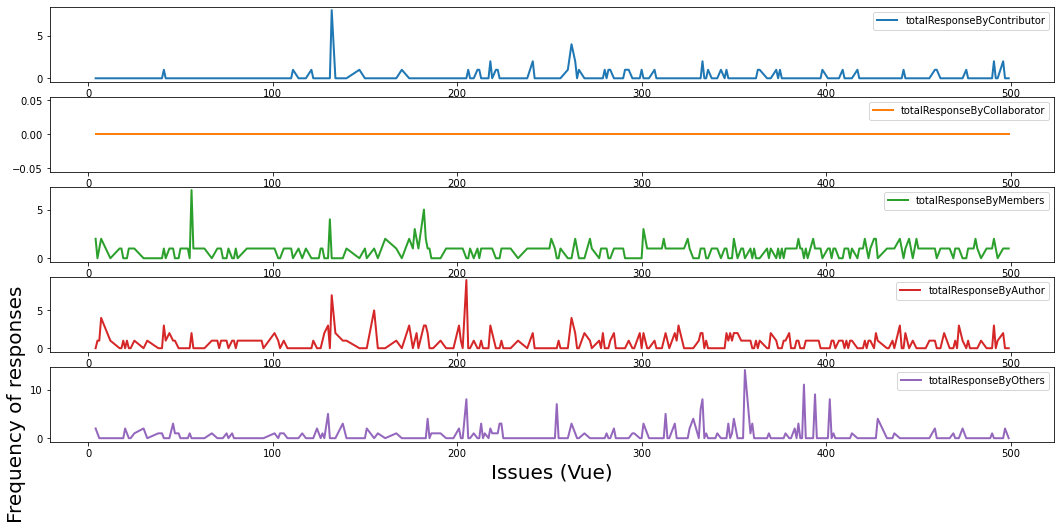

In [7]:
fig, ax = plt.subplots(figsize=(18, 8))
df_vue.plot(subplots = True, ax=ax, linewidth=2)
plt.xlabel("Issues (Vue)", size = 20)
plt.ylabel("Frequency of responses", size = 20)



C:\Users\saura\AppData\Local\Temp\ipykernel_29292\2762763891.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_angular.plot(subplots = True, ax=ax, linewidth=2)


Text(0, 0.5, 'Frequency of responses')

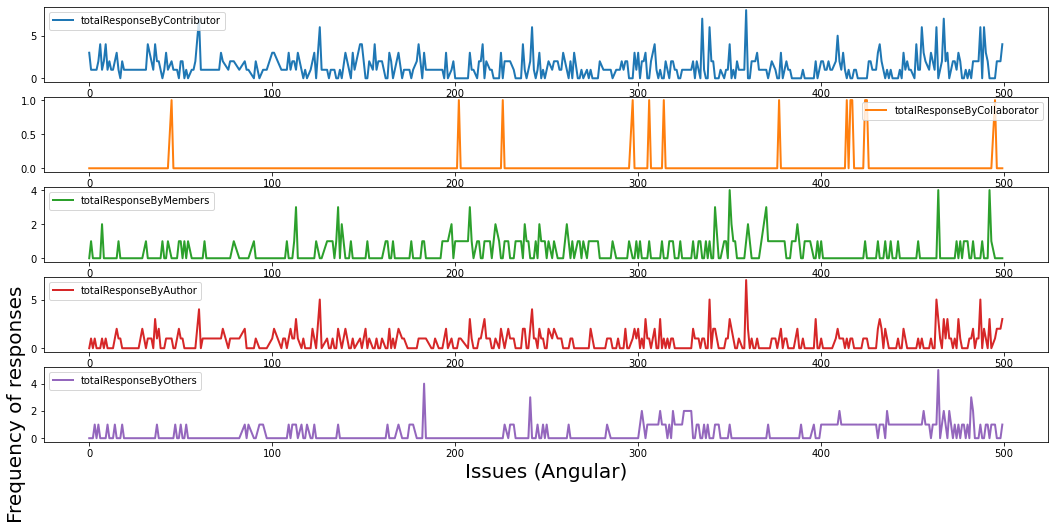

In [8]:
fig, ax = plt.subplots(figsize=(18, 8))
df_angular.plot(subplots = True, ax=ax, linewidth=2)
plt.xlabel("Issues (Angular)", size = 20)
plt.ylabel("Frequency of responses", size = 20)